**Latar Belakang**

PT Kreativa Solusi adalah perusahaan teknologi yang bergerak di bidang pengembangan perangkat lunak berbasis SaaS (Software as a Service). Dalam dua tahun terakhir, perusahaan mengalami tingkat attrition karyawan yang cukup tinggi, terutama di divisi pengembangan produk dan layanan pelanggan. Rata-rata tingkat attrition tahunan mencapai 18%, melebihi rata-rata industri sebesar 12%.

Masalah ini memengaruhi produktivitas tim, meningkatkan biaya perekrutan, dan memperpanjang waktu penyelesaian proyek. Manajemen khawatir jika masalah ini tidak diatasi, perusahaan akan kehilangan daya saing dalam menghadirkan produk berkualitas tinggi ke pasar.


Manajemen PT Kreativa Solusi menghadapi beberapa tantangan utama:
1. Peningkatan Biaya Operasional: Tingginya tingkat turnover mengharuskan perusahaan terus-menerus merekrut dan melatih karyawan baru, yang memakan waktu dan biaya.
2. Penurunan Produktivitas: Kehilangan karyawan kunci memperlambat siklus pengembangan produk.
3. Kepuasan Pelanggan Menurun: Divisi layanan pelanggan sering kekurangan staf, menyebabkan keluhan pelanggan meningkat.
4. Moral Karyawan Rendah: Karyawan yang tersisa merasa terbebani dengan tugas tambahan akibat kurangnya tenaga kerja.


Target yang Ingin Dicapai
1. Menurunkan tingkat attrition karyawan menjadi di bawah 10% dalam waktu satu tahun.
2. Mengidentifikasi penyebab utama karyawan meninggalkan perusahaan.
3. Menyusun strategi untuk meningkatkan retensi karyawan.
4. Meminimalkan dampak finansial dan operasional yang disebabkan oleh attrition.

Kesimpulan

Studi kasus ini menunjukkan bagaimana Attrition Analysis membantu perusahaan memahami masalah attrition karyawan secara mendalam dan merancang strategi berbasis data untuk meningkatkan retensi. Dengan menerapkan langkah-langkah yang direkomendasikan, PT Kreativa Solusi dapat mencapai target bisnisnya dan membangun lingkungan kerja yang lebih positif.

**Step 01: Business Problem**
1. Tingkat attrition karyawan yang tinggi mencapai 18%, melebihi rata-rata industri sebesar 12%. Masalah ini menyebabkan beberapa dampak negatif bagi perusahaan:
2. Peningkatan Biaya Operasional: Tingginya tingkat turnover memaksa perusahaan terus merekrut dan melatih karyawan baru, yang membutuhkan waktu dan biaya besar.
3. Penurunan Produktivitas: Kehilangan karyawan kunci memperlambat siklus pengembangan produk dan menurunkan kualitas layanan.
4. Kepuasan Pelanggan Menurun: Divisi layanan pelanggan sering kekurangan staf, menyebabkan keluhan pelanggan meningkat.
5. Moral Karyawan Rendah: Karyawan yang tersisa merasa terbebani dengan tugas tambahan akibat kurangnya tenaga kerja.

**Step 02: Analysis Objective**
1. Menurunkan tingkat attrition karyawan menjadi di bawah 10% dalam satu tahun.
2. Mengidentifikasi penyebab utama karyawan meninggalkan perusahaan.
3. Menyusun strategi berbasis data untuk meningkatkan retensi karyawan.
4. Meminimalkan dampak finansial dan operasional yang disebabkan oleh attrition.

**Step 03: Key Questions**
1. Divisi mana yang memiliki tingkat attrition tertinggi?
2. Apa penyebab utama karyawan meninggalkan perusahaan (contoh: gaji, lingkungan kerja, atau manajemen)?
3. Apakah terdapat pola tertentu dalam data attrition (contoh: berdasarkan usia, jabatan, atau lama bekerja)?
4. Faktor-faktor apa saja yang memengaruhi keputusan karyawan untuk tetap bekerja?


**Step 04 : Data Findings**

In [1]:
import pandas as pd

# Load the dataset provided by the user
file_path = "/content/drive/MyDrive/03 Materi Data Analyst/14 eBook inSIght/Materi Exclusive/Materi 04 Attrition Analyst /PT_Kreativa_Solusi_Dummy_Data_Attrition.csv"
dataset = pd.read_csv(file_path)
dataset.head()

,EmployeeID,Division,Attrition,ReasonForLeaving,JobSatisfaction,CustomerComplaints,ProductivityScore,WorkloadScore,MoraleScore
0,1,Product Development,No,NaN,3,2,49.306580,31.869778,67.978312
1,2,Finance,No,NaN,1,3,83.439590,33.569764,71.872400
2,3,Sales,No,NaN,5,4,58.418092,48.691601,55.473647
3,4,Customer Service,No,NaN,3,0,46.194270,71.069100,61.723360
4,5,Product Development,No,NaN,2,2,70.014996,22.829266,68.022623


**1. Divisi mana yang memiliki tingkat attrition tertinggi?**

In [4]:
# Filter dataset to include only employees with attrition ("Yes")
attrition_data = dataset[dataset['Attrition'] == 'Yes']

# Calculate attrition rate for each division
division_attrition_rate = attrition_data['Division'].value_counts() / dataset['Division'].value_counts() * 100

# Sort by attrition rate in descending order
division_attrition_rate = division_attrition_rate.sort_values(ascending=False)

# Display the division with the highest attrition rate
division_attrition_rate

,count
Division,
Customer Service,19.931271
Product Development,19.239905
Finance,19.000000
Sales,15.730337
HR,14.141414


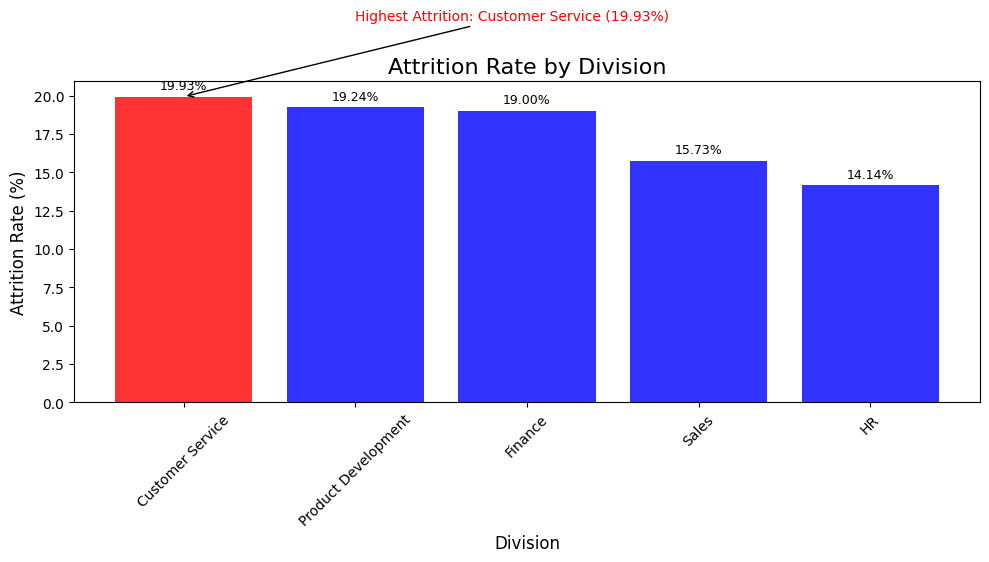

In [5]:
import matplotlib.pyplot as plt

# Prepare data for visualization
division_attrition_rate_sorted = division_attrition_rate.sort_values(ascending=False)

# Plotting the attrition rates for each division
plt.figure(figsize=(10, 6))
bars = plt.bar(
    division_attrition_rate_sorted.index,
    division_attrition_rate_sorted.values,
    color=['red' if division == division_attrition_rate_sorted.idxmax() else 'blue' for division in division_attrition_rate_sorted.index],
    alpha=0.8
)

# Adding labels and title
plt.title("Attrition Rate by Division", fontsize=16)
plt.xlabel("Division", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding data labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{bar.get_height():.2f}%",
        ha='center',
        fontsize=9
    )

# Highlight the division with the highest attrition
plt.annotate(
    f"Highest Attrition: {division_attrition_rate_sorted.idxmax()} ({division_attrition_rate_sorted.max():.2f}%)",
    xy=(0, division_attrition_rate_sorted.max()),
    xytext=(1, division_attrition_rate_sorted.max() + 5),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=10,
    color='red'
)

# Display the plot
plt.tight_layout()
plt.show()

Divisi dengan tingkat attrition tertinggi adalah Customer Service, dengan tingkat attrition sebesar 19.93%.

In [6]:
# Filter attrition data for the division with the highest attrition
highest_attrition_division = division_attrition_rate.idxmax()
division_attrition_reasons = attrition_data[attrition_data['Division'] == highest_attrition_division]['ReasonForLeaving']

# Count reasons for leaving and sort
reason_counts = division_attrition_reasons.value_counts()

# Display the top reasons for attrition in the division
reason_counts.head()

,count
ReasonForLeaving,
Low Salary,18
Workload,17
Poor Management,12
Personal Reasons,6
Lack of Growth,5


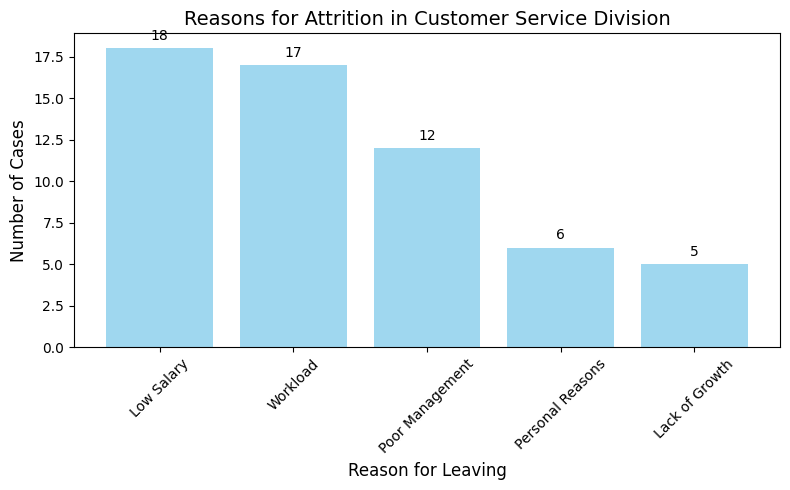

In [7]:
# Plotting the reasons for attrition in the division
plt.figure(figsize=(8, 5))
bars = plt.bar(reason_counts.index, reason_counts.values, color='skyblue', alpha=0.8)

# Adding labels and title
plt.title(f"Reasons for Attrition in {highest_attrition_division} Division", fontsize=14)
plt.xlabel("Reason for Leaving", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding data labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{int(bar.get_height())}",
        ha='center',
        fontsize=10
    )

# Display the plot
plt.tight_layout()
plt.show()

Berikut adalah visualisasi penyebab utama attrition di divisi Customer Service. Penyebab paling dominan adalah Low Salary, diikuti oleh Workload dan Poor Management.

**2. Apa penyebab utama karyawan meninggalkan perusahaan?**

In [8]:
# Calculate overall reasons for leaving across all divisions
overall_reason_counts = attrition_data['ReasonForLeaving'].value_counts()

# Display the top reasons for leaving overall
overall_reason_counts.head()

,count
ReasonForLeaving,
Workload,60
Low Salary,50
Poor Management,44
Lack of Growth,21
Personal Reasons,11


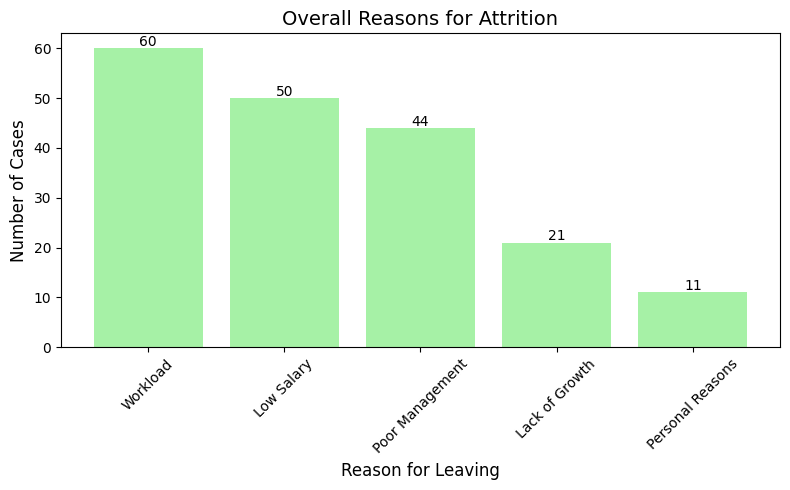

In [9]:
# Plotting the overall reasons for attrition
plt.figure(figsize=(8, 5))
bars = plt.bar(overall_reason_counts.index, overall_reason_counts.values, color='lightgreen', alpha=0.8)

# Adding labels and title
plt.title("Overall Reasons for Attrition", fontsize=14)
plt.xlabel("Reason for Leaving", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding data labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{int(bar.get_height())}",
        ha='center',
        fontsize=10
    )

# Display the plot
plt.tight_layout()
plt.show()

Penyebab paling dominan adalah Workload, diikuti oleh Low Salary dan Poor Management.

**3. Apakah terdapat pola tertentu dalam data attrition (contoh: berdasarkan usia, jabatan, atau lama bekerja)?**

Untuk mencari pola dalam data attrition, kita bisa menganalisis hubungan antara status attrition dan berbagai faktor seperti:
1. Division: Divisi dengan attrition tertinggi.
2. Job Satisfaction: Apakah kepuasan kerja rendah terkait dengan attrition?
3. WorkloadScore: Apakah beban kerja tinggi berkaitan dengan attrition?
4. MoraleScore: Apakah moral kerja rendah merupakan indikator attrition?

<ipython-input-11-7b458cff3e94>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='JobSatisfaction', data=data_copy, palette="pastel")
<ipython-input-11-7b458cff3e94>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='WorkloadScore', data=data_copy, palette="pastel")
<ipython-input-11-7b458cff3e94>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MoraleScore', data=data_copy, palette="pastel")
<ipython-input-11-7b458cff3e94>:35: FutureWarning: 

Passing `palette` without assigning `hue` is

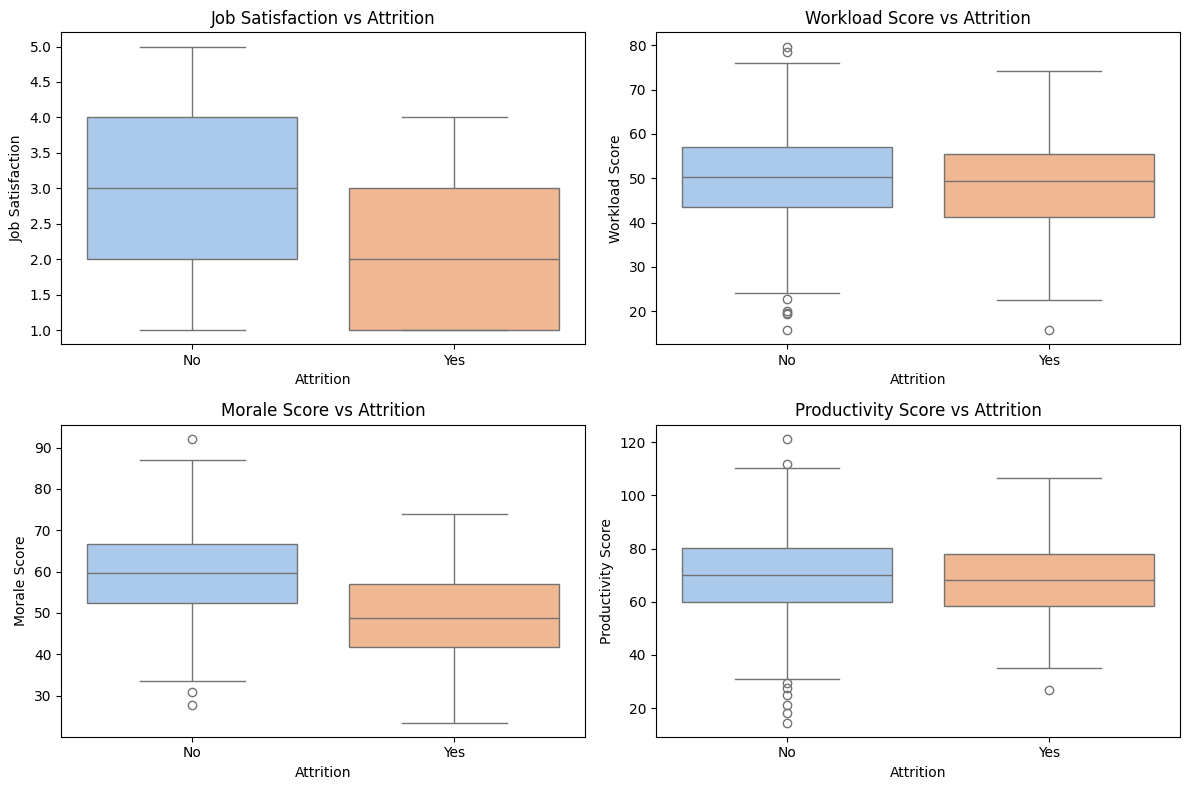

In [11]:
import seaborn as sns

# Creating a copy of the dataset for visualization
data_copy = dataset.copy()

# Encode 'Attrition' as binary (Yes=1, No=0) for analysis
data_copy['AttritionBinary'] = data_copy['Attrition'].map({'Yes': 1, 'No': 0})

# Plotting relationships between Attrition and numerical factors
plt.figure(figsize=(12, 8))

# Job Satisfaction vs Attrition
plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data_copy, palette="pastel")
plt.title("Job Satisfaction vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Job Satisfaction", fontsize=10)

# Workload Score vs Attrition
plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='WorkloadScore', data=data_copy, palette="pastel")
plt.title("Workload Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Workload Score", fontsize=10)

# Morale Score vs Attrition
plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='MoraleScore', data=data_copy, palette="pastel")
plt.title("Morale Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Morale Score", fontsize=10)

# Productivity Score vs Attrition
plt.subplot(2, 2, 4)
sns.boxplot(x='Attrition', y='ProductivityScore', data=data_copy, palette="pastel")
plt.title("Productivity Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Productivity Score", fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi hubungan antara status attrition dan beberapa faktor:
1. Job Satisfaction: Karyawan yang meninggalkan perusahaan cenderung memiliki kepuasan kerja lebih rendah.
2. Workload Score: Beban kerja cenderung lebih tinggi pada karyawan yang mengalami attrition.
3. Morale Score: Moral karyawan yang meninggalkan perusahaan tampak lebih rendah dibandingkan dengan mereka yang tetap bekerja.
4. Productivity Score: Tidak ada perbedaan mencolok, tetapi karyawan yang tetap bekerja sedikit lebih produktif.

Pola ini menunjukkan bahwa faktor-faktor seperti kepuasan kerja, beban kerja, dan morale berperan penting dalam attrition. Morale dalam kasus ini dapat diartikan sebagai tingkat semangat kerja, motivasi, dan kepuasan emosional seorang karyawan terhadap pekerjaan mereka dan lingkungan kerja secara keseluruhan.

**4. Seberapa besar Kenaikan Biaya Rekrutmen dan Pelatihan?**

Asumsikan
1. Biaya rekrutmen per karyawan: Rp200.000.
2. Biaya pelatihan per karyawan: Rp1.000.000.
3. Jumlah karyawan yang mengalami attrition: 2 karyawan per bulan.


In [12]:
# Assumptions
recruitment_cost_per_employee = 200000  # IDR
training_cost_per_employee = 1000000  # IDR
attrition_per_month = 2  # employees

# Calculate monthly and annual costs
monthly_cost = attrition_per_month * (recruitment_cost_per_employee + training_cost_per_employee)
annual_cost = monthly_cost * 12

monthly_cost, annual_cost


(2400000, 28800000)

Maka kenaikan biaya adalah:
* Per bulan: Rp2.400.000.
* Per tahun: Rp28.800.000